In [7]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline

from nnn.uv import *

# 07/05/2023

## Design some IDT oligos

In [10]:
from nupack import Domain, TargetStrand, TargetComplex, TargetTube, tube_design, Diversity

In [4]:
arr = pd.read_csv('./data/models/raw/arr_v0_n=30680.csv', index_col=0)

In [6]:
arr.loc[['WC202', 'WC1375', 'WC2287'], 'RefSeq']

SEQID
WC202     GATAACGAAAGTTATC
WC1375    GTCAGGGAAACCTGAC
WC2287    GGCCGGGAAACCGGCC
Name: RefSeq, dtype: object

In [52]:
from nnn import design

target = dict(a='SN21S',
              b='SN21S',
              struct='('*23 + '+' + ')'*23,
              Tm=85,
              sodium=0.088,
              ss_conc=7.2e-5,
              task_name='wc23_1-1',
              prefix='DWC',
              start_index=1,
              n=2)

# df = design.design_target(target)

In [53]:
a = Domain(target['a'], name='a')
A = TargetStrand([a], name='strand A')
A_r = TargetStrand([~a], name='strand A reverse')

duplex = TargetComplex([A, A_r], target['struct'], name=target['task_name'])
strandA = TargetComplex([A], A.nt() * '.', name='free strand A')
strandAr = TargetComplex([A_r], A.nt() * '.', name='free strand A_r')

t1 = TargetTube(on_targets={duplex: 0.5 * target['ss_conc'],
                            strandA: 0.5 * target['ss_conc'],
                            strandAr: 0.5 * target['ss_conc']}, 
                name=target['task_name'] + '_tube')

div1 = Diversity(word=4, types=2)

my_model = nupack.Model(material='dna04', celsius=target['Tm'], sodium=target['sodium'], magnesium=0.0)
my_design = tube_design(tubes=[t1],
                        soft_constraints=[],
                        defect_weights=None,
                        model=my_model,
                        hard_constraints=[div1])
my_results = my_design.run(trials=target['n'])

In [54]:
results = []
for i in range(target['n']):
    results.append(design.parse_nupack_result(my_results[i]))

In [57]:
strand = results[0][0]
util.get_GC_content(strand)

77.27272727272727

In [60]:
strand

'GCGGCCCTTGCACGGAGGCACC'

## The power of context

In [94]:
df_nnn = arr.query('Series == "TETRAloop" & ConstructType == "NNN"')
# df_nn = arr.query('Series == "TETRAloop" & ConstructType == "NN"')

In [95]:
np.unique(df_nnn.bottomScaffold)

array(['GATCGATC'], dtype=object)

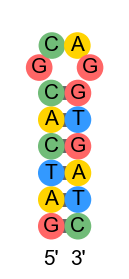

In [101]:
draw_struct('GATCACGCAGGTGATC', '((((((....))))))')

There's only one scaffold for NNN but it is different from that of the NN group. So I am just using NNN here and coloring the points by how many nt is different.

In [85]:
df_nnn.RefSeq

SEQID
TETNNN0       GATCAAAAAATTGATC
TETNNN1       GATCAAAAATTTGATC
TETNNN10      GATCAAAACCTTGATC
TETNNN100     GATCAATCTATTGATC
TETNNN1000    GATCACGCCAGTGATC
                    ...       
TETNNN995     GATCACGCAGGTGATC
TETNNN996     GATCACGCTAGTGATC
TETNNN997     GATCACGCTTGTGATC
TETNNN998     GATCACGCTCGTGATC
TETNNN999     GATCACGCTGGTGATC
Name: RefSeq, Length: 4070, dtype: object

In [104]:
get_nth_pair = lambda seq, n: seq[3+n] + seq[-4-n]
get_loop = lambda seq: seq[6:10]
get_nth_pair('GATCACGCAGGTGATC', 2), get_loop('GATCACGCAGGTGATC')

('CG', 'GCAG')

In [128]:
df_nnn['pair1'] = df_nnn.RefSeq.apply(lambda seq: get_nth_pair(seq, 1))
df_nnn['pair2'] = df_nnn.RefSeq.apply(lambda seq: get_nth_pair(seq, 2))
df_nnn['pair3'] = df_nnn.RefSeq.apply(lambda seq: get_nth_pair(seq, 3))
df_nnn['loop'] = df_nnn.RefSeq.apply(get_loop)

In [107]:
np.unique(df_nnn.loop, return_counts=True)

(array(['AAAA', 'AAAC', 'AAAG', 'AAAT', 'AACA', 'AACC', 'AACG', 'AACT',
        'AAGA', 'AAGC', 'AAGG', 'AAGT', 'AATA', 'AATC', 'AATG', 'AATT',
        'ACAA', 'ACAC', 'ACAG', 'ACAT', 'ACCA', 'ACCC', 'ACCG', 'ACCT',
        'ACGA', 'ACGC', 'ACGG', 'ACGT', 'ACTA', 'ACTC', 'ACTG', 'ACTT',
        'AGAA', 'AGAC', 'AGAG', 'AGAT', 'AGCA', 'AGCC', 'AGCG', 'AGCT',
        'AGGA', 'AGGC', 'AGGG', 'AGGT', 'AGTA', 'AGTC', 'AGTG', 'AGTT',
        'ATAA', 'ATAC', 'ATAG', 'ATAT', 'ATCA', 'ATCC', 'ATCG', 'ATCT',
        'ATGA', 'ATGC', 'ATGG', 'ATGT', 'ATTA', 'ATTC', 'ATTG', 'ATTT',
        'CAAA', 'CAAC', 'CAAG', 'CAAT', 'CACA', 'CACC', 'CACG', 'CACT',
        'CAGA', 'CAGC', 'CAGG', 'CAGT', 'CATA', 'CATC', 'CATG', 'CATT',
        'CCAA', 'CCAC', 'CCAG', 'CCAT', 'CCCA', 'CCCC', 'CCCG', 'CCCT',
        'CCGA', 'CCGC', 'CCGG', 'CCGT', 'CCTA', 'CCTC', 'CCTG', 'CCTT',
        'CGAA', 'CGAC', 'CGAG', 'CGAT', 'CGCA', 'CGCC', 'CGCG', 'CGCT',
        'CGGA', 'CGGC', 'CGGG', 'CGGT', 'CGTA', 'CGTC', 'CGTG', 

<Axes: xlabel='dH', ylabel='Tm'>

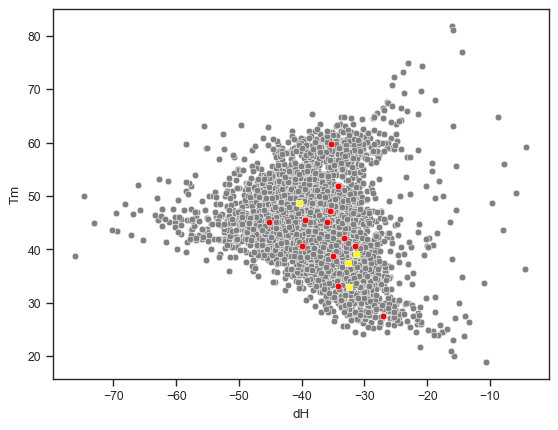

In [137]:
loop_2_plot = 'AACA'
pair1_2_plot = 'AT'
y = 'Tm'
sns.scatterplot(data=df_nnn, x='dH', y=y, color='gray')
sns.scatterplot(data=df_nnn.query('loop == "%s"'%loop_2_plot), x='dH', y=y, color='r', marker='o')
sns.scatterplot(data=df_nnn.query('loop == "%s" & pair1 == "%s"' % (loop_2_plot, pair1_2_plot)), x='dH', y=y, color='yellow', marker='s')
# plt.xscale('symlog')

Need to regress out the impact of context...

# 07/07/2023

## literature mismatches

### formatting

In [1]:
with open('./data/literature/Oliveira_2020_mismatches.csv', 'r') as fh:
    lines = fh.readlines()

In [4]:
new_lines = [line.replace(' ', ',') for line in lines if '/' in line]

In [5]:
len(lines), len(new_lines)

(2900, 2775)

In [12]:
new_lines = ['center,Tm,Tm_pred,melting_index\n'] + new_lines

In [14]:
with open('./data/literature/Oliveira_2020_mismatches.csv', 'w+') as fh:
    fh.writelines(new_lines)

### next step

In [15]:
mmdf = pd.read_csv('./data/literature/Oliveira_2020_mismatches.csv')

In [16]:
mmdf

,center,Tm,Tm_pred,melting_index
0,GCG/CGC,69.3,71.47,3.8891
1,GCC/CGG,68.7,69.73,3.8559
2,GGG/CCC,67.7,70.50,3.8707
3,GAC/CTG,67.2,65.46,3.7743
4,GGA/CCT,66.6,66.74,3.7988
...,...,...,...,...
2770,ACC/GCT,42.6,44.28,3.3693
2771,ACC/CAT,42.4,45.11,3.3851
2772,ACC/ACC,42.2,44.95,3.3820
2773,ACC/ATT,42.2,45.42,3.3910


# 07/11/2023

In [28]:
arr = pd.read_csv('./data/models/raw/arr_v0_n=30680.csv', index_col=0)
arr['Scaffold'] = [f'{top}_{bottom}' for top,bottom in zip(arr.topScaffold, arr.bottomScaffold)]

In [34]:
arr_summary = arr.groupby(['Series', 'ConstructType', 'Scaffold']).apply(len)#.to_csv('./data/test/arr_v0_summary.csv')

In [39]:
print(arr_summary['MisMatches'])

ConstructType       Scaffold  
3mer                GCGC_GCGC     1996
AC_mismatch_varpos  GC_GC         2703
Centered            CGAAA_CGCG       3
                    CGAAC_CGCG       3
                    CGAAG_CGCG       3
                                  ... 
                    CGTTC_CGCG       3
                    CGTTG_CGCG       3
                    CGTTT_CGCG       3
                    CG_GC         2791
GT_mismatch_varpos  GC_GC         3635
Length: 68, dtype: int64


In [27]:
arr.columns

Index(['dH', 'dH_se', 'dH_lb', 'dH_ub', 'Tm', 'Tm_se', 'Tm_lb', 'Tm_ub',
       'dG_37', 'dG_37_se', 'dG_37_lb', 'dG_37_ub', 'dS', 'dS_se', 'dS_lb',
       'dS_ub', 'fmax', 'fmax_se', 'fmax_lb', 'fmax_ub', 'fmin', 'fmin_se',
       'fmin_lb', 'fmin_ub', 'Series', 'ConstructType', 'bottomScaffold',
       'topScaffold', 'RefSeq', 'dH_NUPACK', 'dS_NUPACK', 'Tm_NUPACK',
       'dG_37_ensemble_NUPACK', 'TargetStruct', 'dG_37_NUPACK',
       'dG_37_ensemble_150mM_NUPACK', 'dG_37_ensemble_75mM_NUPACK', 'GC',
       'Tm_NUPACK_salt_corrected', 'dG_37_NUPACK_salt_corrected',
       'dH_NUPACK_salt_corrected', 'dS_NUPACK_salt_corrected'],
      dtype='object')

## WC "fingerprints"?

In [44]:
from RiboGraphViz import LoopExtruder, StackExtruder

In [94]:
def clean(x):
    return x.replace(' ','+').replace(',', '_')

def get_element(row):
    element = None
    if row['Series'] == 'WatsonCrick':
        stacks = StackExtruder(row.RefSeq, row.TargetStruct, stack_size=5)
        if isinstance(row.topScaffold, str):
            stack_ind = int(len(row.topScaffold) / 2)
        else:
            stack_ind = 0
            
        element = clean(stacks[stack_ind])
    return element

In [95]:
arr_wc = arr.query('Series == "WatsonCrick"')
arr_wc['element'] = arr_wc.apply(get_element, axis=1)

In [96]:
arr_wc.element

SEQID
WC1       AAAAA+TTTTT_(((((+)))))
WC10      AAAAC+GTTTT_(((((+)))))
WC100     AAGAT+ATCTT_(((((+)))))
WC1000    TTACT+AGTAA_(((((+)))))
WC1001    TTACT+AGTAA_(((((+)))))
                   ...           
WC994     TTAGC+GCTAA_(((((+)))))
WC995     TTAGC+GCTAA_(((((+)))))
WC997     TTACA+TGTAA_(((((+)))))
WC998     TTACA+TGTAA_(((((+)))))
WC999     TTACT+AGTAA_(((((+)))))
Name: element, Length: 2680, dtype: object

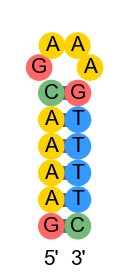

In [99]:
row = arr.loc['WC10',:]
draw_struct(row.RefSeq, row.TargetStruct)

In [103]:
arr_wc.groupby('element')['dH'].apply(np.nanmean)

element
AAAAA+TTTTT_(((((+)))))   -27.771041
AAAAC+GTTTT_(((((+)))))   -30.156725
AAAAG+CTTTT_(((((+)))))   -32.312448
AAAAT+ATTTT_(((((+)))))   -34.234793
AAACA+TGTTT_(((((+)))))   -27.551854
                             ...    
TTTGT+ACAAA_(((((+)))))   -32.341323
TTTTA+TAAAA_(((((+)))))   -32.771106
TTTTC+GAAAA_(((((+)))))   -27.903369
TTTTG+CAAAA_(((((+)))))   -27.813936
TTTTT+AAAAA_(((((+)))))   -35.418384
Name: dH, Length: 1003, dtype: float64

In [141]:
element_fingerprint = pd.pivot_table(arr_wc, values=['dH', 'Tm'], index=['element'], columns=['ConstructType'])
element_fingerprint

Tm                               dH  \
ConstructType           WC_5ntstem WC_6ntstem WC_7ntstem WC_5ntstem   
element                                                               
AAAAA+TTTTT_(((((+)))))        NaN  18.731768  36.483276        NaN   
AAAAC+GTTTT_(((((+)))))  37.132915  45.121187  47.996544 -14.494528   
AAAAG+CTTTT_(((((+)))))        NaN  30.229126  41.147842        NaN   
AAAAT+ATTTT_(((((+)))))        NaN  28.772684  41.388387        NaN   
AAACA+TGTTT_(((((+)))))  15.990539  36.411964  45.724400 -11.415454   
...                            ...        ...        ...        ...   
TTTGT+ACAAA_(((((+)))))  26.330504  43.977852  48.675435 -11.743985   
TTTTA+TAAAA_(((((+)))))        NaN  27.268499  39.025229        NaN   
TTTTC+GAAAA_(((((+)))))  28.172469  46.888636  48.948536 -14.015987   
TTTTG+CAAAA_(((((+)))))  18.012775  39.608862  47.380115  -9.855845   
TTTTT+AAAAA_(((((+)))))        NaN  33.898367  42.064275        NaN   

                                               
ConstructType           WC_6ntstem WC_7ntstem  
element                                        
AAAAA+TTTTT_(((((+))))) -14.556211 -40.985871  
AAAAC+GTTTT_(((((+))))) -37.950666 -38.024979  
AAAAG+CTTTT_(((((+))))) -26.232768 -38.392127  
AAAAT+ATTTT_(((((+))))) -23.423004 -45.046582  
AAACA+TGTTT_(((((+))))) -30.079614 -41.160493  
...                            ...        ...  
TTTGT+ACAAA_(((((+))))) -38.145933 -47.134050  
TTTTA+TAAAA_(((((+))))) -21.588786 -43.953427  
TTTTC+GAAAA_(((((+))))) -27.807044 -41.887075  
TTTTG+CAAAA_(((((+))))) -31.975973 -41.609991  
TTTTT+AAAAA_(((((+))))) -28.392666 -42.444102  

[1003 rows x 6 columns]

In [143]:
mask = element_fingerprint.isna()

element_fingerprint.fillna(0, inplace=True)

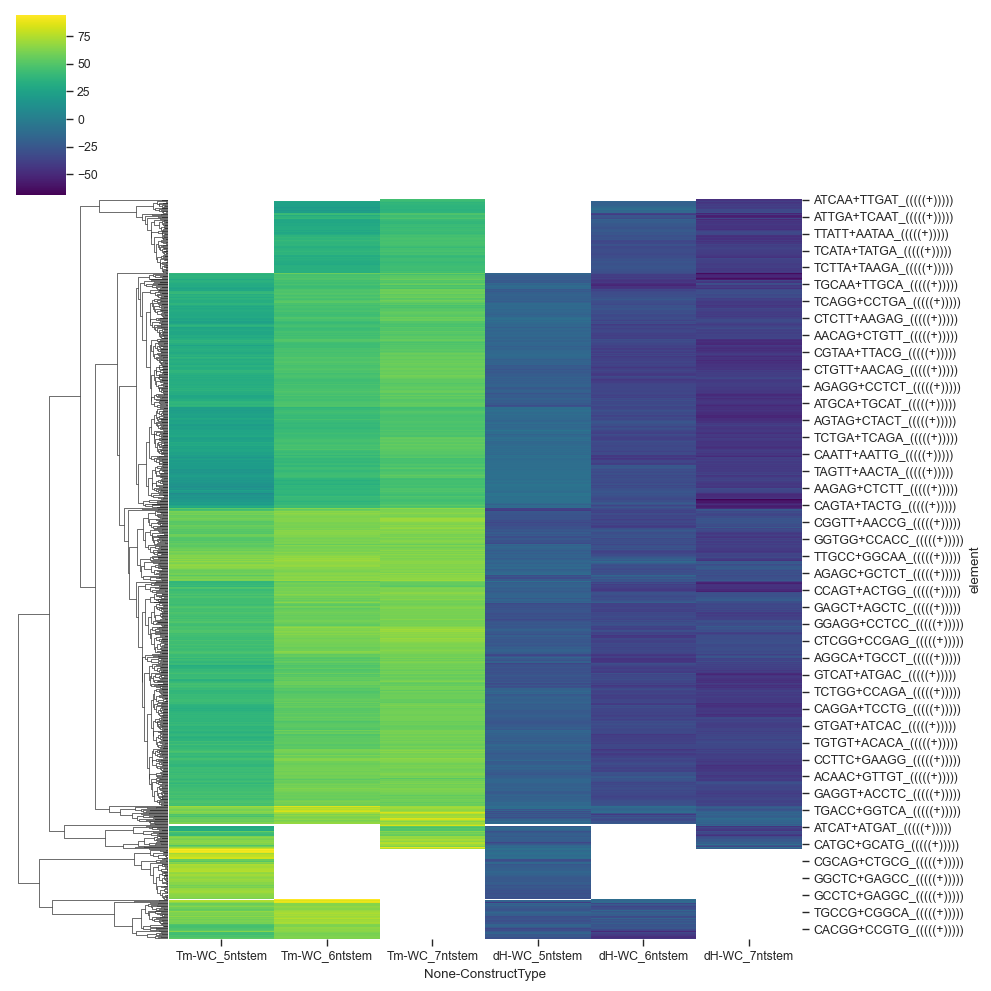

In [145]:
sns.clustermap(data=element_fingerprint, col_cluster=False, mask=mask, cmap='viridis')

In [146]:
from scipy.cluster.hierarchy import ward, fcluster, dendrogram
from scipy.spatial.distance import pdist

In [128]:
Z = ward(pdist(element_fingerprint.values))

In [129]:
Z.shape

(1002, 4)

In [127]:
element_fingerprint.values.shape

(1003, 6)

In [169]:
Z[:,2]

array([7.85142258e-02, 1.29979461e-01, 2.47368675e-01, ...,
       6.57519886e+02, 6.84053736e+02, 1.11487041e+03])

In [173]:
element_clusters = fcluster(Z, t=200, criterion='distance')
print(np.unique(element_clusters))
element_cluster_color = [sns.color_palette('tab20')[x] for x in element_clusters]

[1 2 3 4 5 6 7]


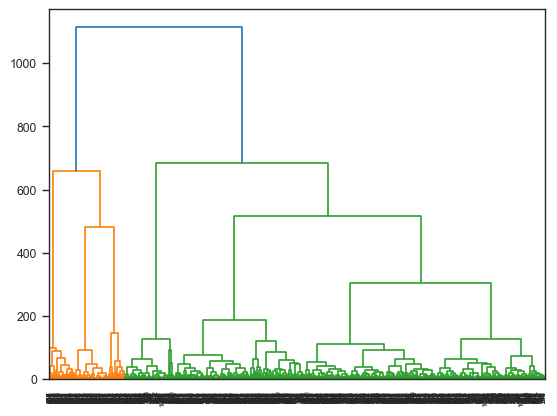

In [148]:
dendrogram(Z)
plt.show()

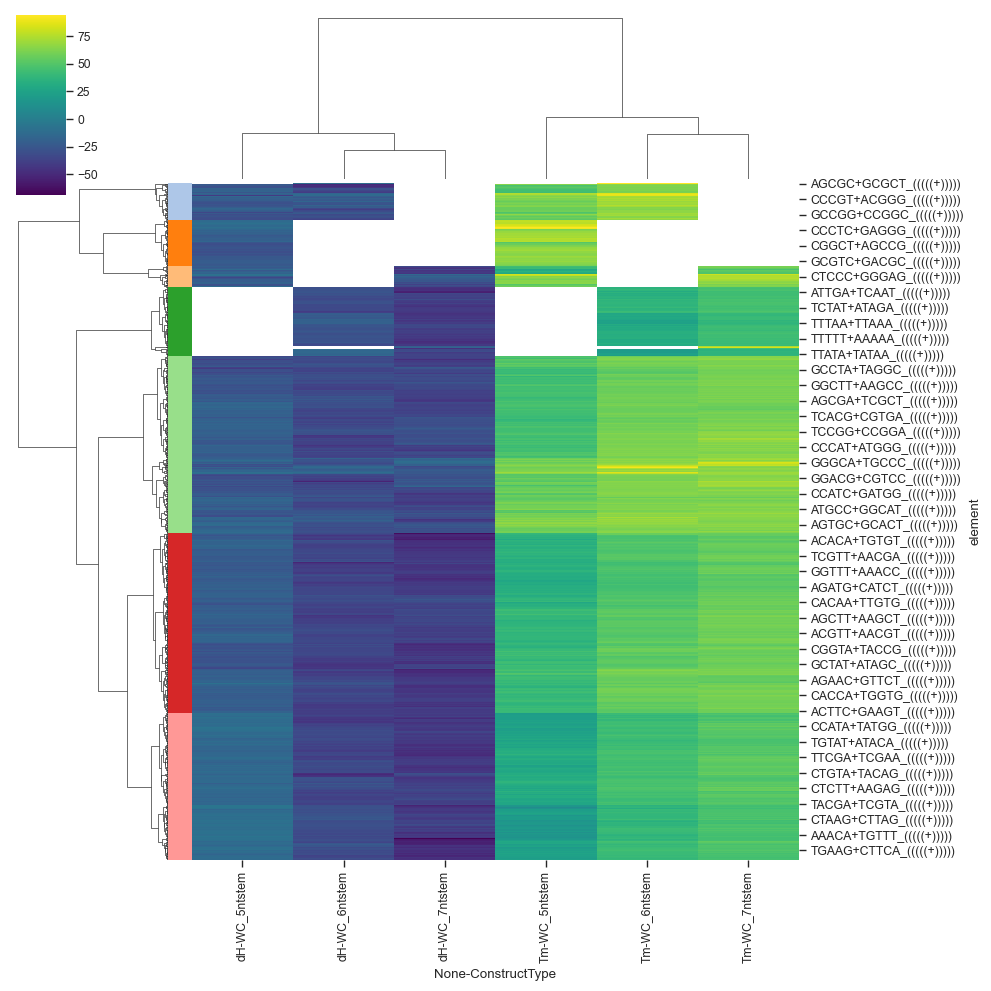

In [174]:
sns.clustermap(element_fingerprint, row_linkage=Z, row_colors=element_cluster_color,
               mask=mask, cmap='viridis')

I'm happy with this clustering.

## Tetraloop

In [184]:
def clean(x):
    return x.replace(' ','+').replace(',', '_')

def get_element(row):
    element = None
    
    if row['Series'] == 'WatsonCrick':
        stacks = StackExtruder(row.RefSeq, row.TargetStruct, stack_size=5)
        if isinstance(row.topScaffold, str):
            stack_ind = int(len(row.topScaffold) / 2)
        else:
            stack_ind = 0
        element = clean(stacks[stack_ind])
        
    elif row['Series'] == 'TETRAloop':
        neighbor_bps = 1 if row.ConstructType == 'NN' else 2
        element = clean(LoopExtruder(row.RefSeq, row.TargetStruct, neighbor_bps=neighbor_bps)[0])    
        
    return element

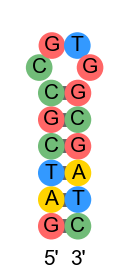

In [192]:
row = arr.loc['TETNNN2999',:]
draw_struct(row.RefSeq, row.TargetStruct)

In [193]:
get_element(row)

'GCCGTGGC_((....))'

In [194]:
arr_tetra = arr.query('Series == "TETRAloop"')

In [195]:
arr_tetra['element'] = arr_tetra.apply(get_element, axis=1)

In [247]:
element_fingerprint = pd.pivot_table(arr_tetra.query('ConstructType == "NN"'), values=['dH', 'Tm'], index=['element'], columns=['bottomScaffold'])
mask = element_fingerprint.isna()
element_fingerprint.fillna(0, inplace=True)
element_fingerprint

Tm                    dH           
bottomScaffold   CGCGCGCG       GCGC   CGCGCGCG       GCGC
element                                                   
AAAAAT_(....)   49.084140  26.728791 -38.078886  -9.852481
AAAACT_(....)   52.511284  31.381181 -38.408474 -12.877847
AAAAGT_(....)   50.955521  32.063423 -36.601034 -11.842085
AAAATT_(....)   58.975270  38.457427 -31.973111 -19.468878
AAACAT_(....)   60.884804  39.279271 -29.431373 -22.668536
...                   ...        ...        ...        ...
TTTGTA_(....)   64.136150  45.187629 -34.788232 -24.925197
TTTTAA_(....)    0.000000  48.334039   0.000000 -26.403945
TTTTCA_(....)   62.637687  44.593623 -37.485473 -25.200123
TTTTGA_(....)   65.446447  45.327375 -31.174407 -24.228013
TTTTTA_(....)   63.608094  45.438714 -53.437508 -27.030501

[989 rows x 4 columns]

In [248]:
Z = ward(pdist(element_fingerprint.values))

In [256]:
max(element_clusters)

6

In [249]:
element_clusters = fcluster(Z, t=125, criterion='distance')
print(np.unique(element_clusters))
element_cluster_color = [sns.color_palette('tab20')[x] for x in element_clusters]

[1 2 3 4 5 6]


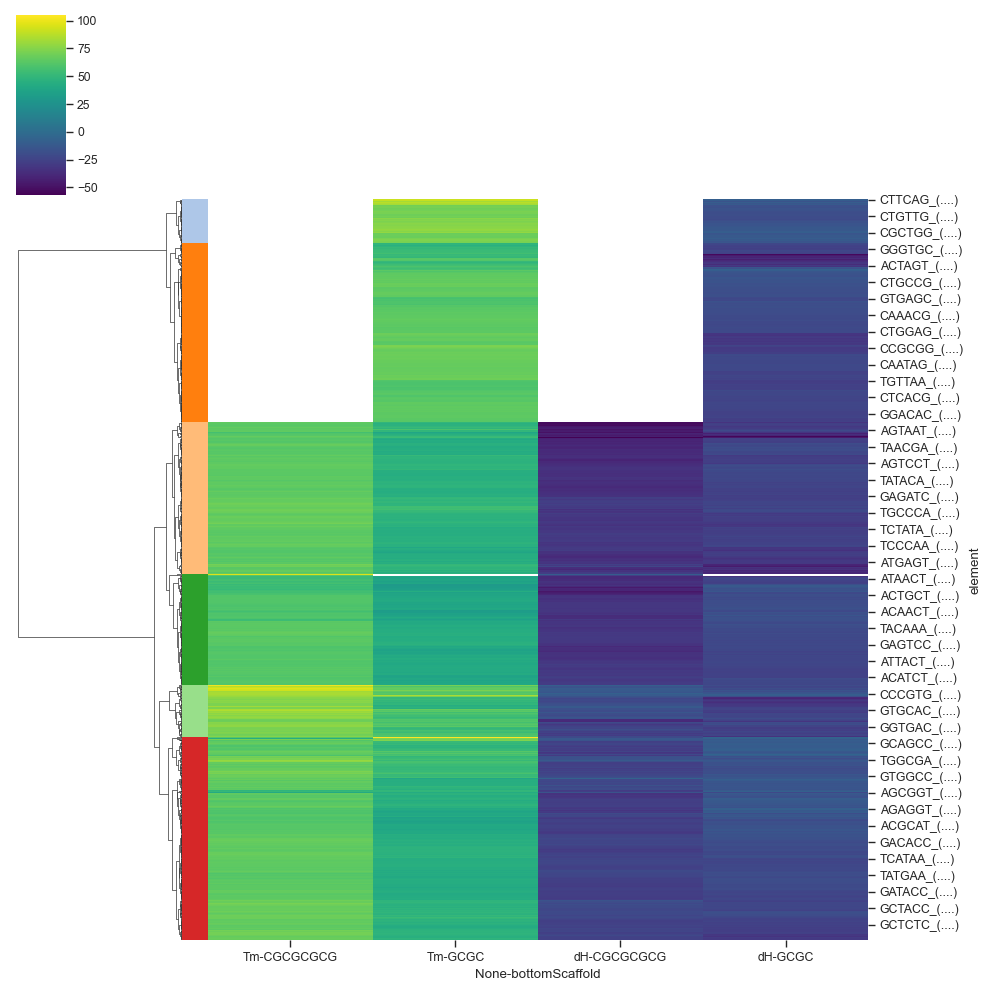

In [250]:
sns.clustermap(element_fingerprint, row_linkage=Z, row_colors=element_cluster_color, col_cluster=False,
               mask=mask, cmap='viridis')

In [233]:
element_cluster_df = element_fingerprint.copy()
element_cluster_df.columns = ['_'.join(col) for col in element_cluster_df.columns.values]
element_cluster_df['cluster_ind'] = element_clusters
# element_cluster_df = pd.DataFrame(data=element_clusters, index=element_fingerprint.index, columns=['cluster_ind'])

In [240]:
element_cluster_df.groupby('cluster_ind').apply(lambda x: np.median(x, axis=0))#.values.tolist()

[array([ 0.        , -1.55992499,  1.        ]),
 array([ 0.        , -2.06555152,  2.        ]),
 array([-2.25531588, -0.31635447,  3.        ]),
 array([-2.29045671, -0.88258264,  4.        ]),
 array([-1.91159878, -0.63485606,  5.        ]),
 array([-2.37485454, -1.34606477,  6.        ]),
 array([-2.85723694, -0.80876482,  7.        ]),
 array([-3.4136113 , -1.43964427,  8.        ])]

In [246]:
element_cluster_df.groupby('cluster_ind').apply(lambda x: np.nanmedian(x, axis=0))

cluster_ind
1                    [0.0, -1.5599249928439525, 1.0]
2                     [0.0, -2.065551517509999, 2.0]
3     [-2.255315882672216, -0.3163544695920993, 3.0]
4     [-2.290456712408046, -0.8825826378475381, 4.0]
5    [-1.9115987824371694, -0.6348560589553072, 5.0]
6     [-2.374854539800791, -1.3460647731091127, 6.0]
7    [-2.8572369401095057, -0.8087648210294545, 7.0]
8      [-3.41361129713829, -1.4396442683525574, 8.0]
dtype: object

In [235]:
element_cluster_df

,dG_37_CGCGCGCG,dG_37_GCGC,cluster_ind
element,,,
AAAAAT_(....),-2.025672,0.311099,3
AAAACT_(....),-2.255316,0.220680,3
AAAAGT_(....),-2.128224,0.165089,3
AAAATT_(....),-2.022774,-0.127823,3
AAACAT_(....),-2.130430,-0.201916,3
...,...,...,...
TTTGTA_(....),-2.811890,-1.002954,7
TTTTAA_(....),0.000000,-1.465470,1
TTTTCA_(....),-2.879470,-0.805054,7


# 07/13/2023

In [251]:
from nnn import element

In [397]:
element_fingerprint = element.get_element_fingerprint(arr, 
                                query='Series == "TETRAloop" & ConstructType == "NN"',
                                scaffold_name='bottomScaffold',
                                seq_only=True
                               )

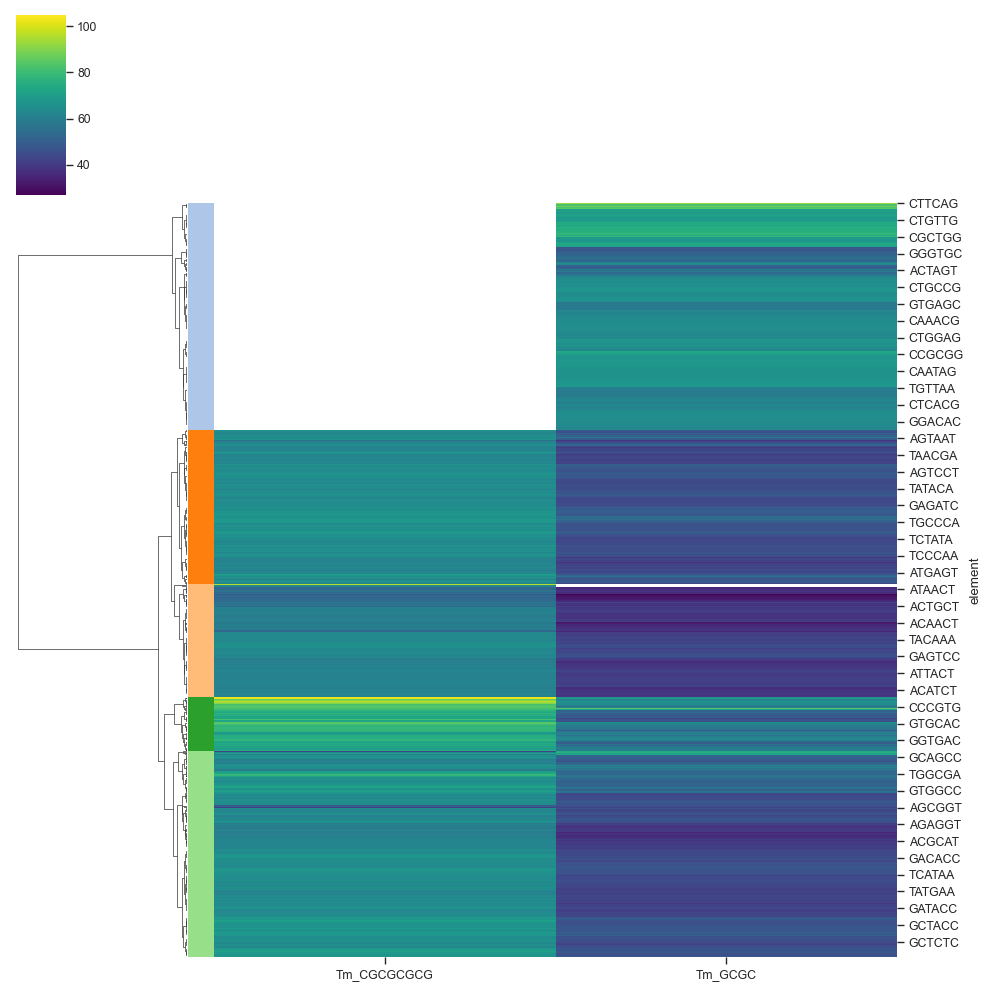

In [485]:
cluster_arr, reordered_ind = element.ward_cluster(element_fingerprint, t=5, criterion='maxclust')
util.save_fig('./fig/Fig3/clusters/tetraloop_clustermap.pdf')

In [389]:
cluster_median = element_fingerprint.groupby('cluster_ind').apply(lambda x: np.nanmedian(x, axis=0)).values

cluster_median_df = pd.DataFrame(
    data=np.concatenate(cluster_median).reshape(len(cluster_median), -1),
    columns=element_fingerprint.columns).set_index('cluster_ind')
cluster_median_df.index = cluster_median_df.index.astype(int)
cluster_median_df

,Tm_CGCGCGCG,Tm_GCGC,dH_CGCGCGCG,dH_GCGC
cluster_ind,,,,
1,NaN,64.773069,NaN,-22.088264
2,64.161013,45.702906,-34.434706,-26.422496
3,60.765983,39.726530,-32.571944,-21.904857
4,76.175111,58.350749,-18.863471,-24.728829
5,64.464537,45.110490,-25.828431,-19.205767


In [390]:
cluster_std = element_fingerprint.groupby('cluster_ind').apply(lambda x: np.nanstd(x, axis=0)).values

cluster_std_df = pd.DataFrame(
    data=np.concatenate(cluster_std).reshape(len(cluster_std), -1),
    columns=element_fingerprint.columns).set_index('cluster_ind')
cluster_std_df.index = cluster_std_df.index.astype(int)
cluster_std_df

,Tm_CGCGCGCG,Tm_GCGC,dH_CGCGCGCG,dH_GCGC
cluster_ind,,,,
0,NaN,6.946099,NaN,6.617495
0,2.107908,3.179358,5.790291,5.523844
0,4.618529,3.401719,4.241790,3.496591
0,7.551244,7.502842,7.051096,6.531595
0,3.949364,6.757214,3.895540,5.421553


<Axes: xlabel='cluster_ind', ylabel='Tm_GCGC'>

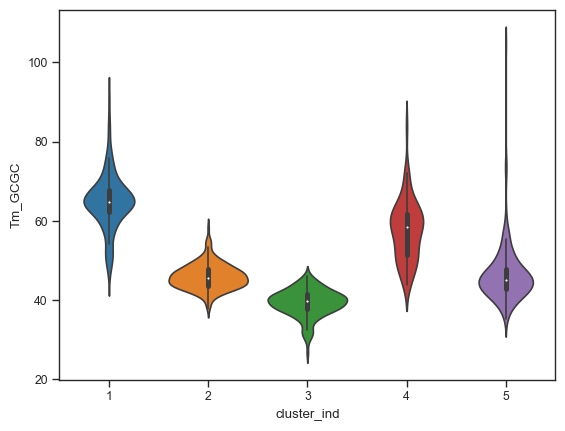

In [392]:
sns.violinplot(data=element_fingerprint, x='cluster_ind', y='Tm_GCGC')

In [393]:
cluster_color = sns.color_palette('tab20')[1:max(cluster_arr)+1]

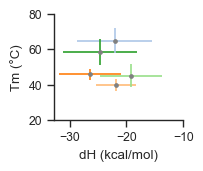

In [394]:
plt.figure(figsize=(4.25*cm, 3.5*cm))
plt.errorbar(y=cluster_median_df.Tm_GCGC, x=cluster_median_df.dH_GCGC,
             yerr=cluster_std_df.Tm_GCGC, xerr=cluster_std_df.dH_GCGC,
            fmt='.', mfc='gray', mec='gray', ecolor=cluster_color)
plt.xlim(right=-10)
plt.ylim([20,80])
plt.xlabel('dH (kcal/mol)')
plt.ylabel('Tm (°C)')
sns.despine()
util.save_fig('./fig/Fig3/clusters/tetraloop_cluster_errorbar.pdf')

In [420]:
# in the order of the plot
reordered_element_arr = element_fingerprint.index.values[reordered_ind]

In [430]:
# base_dict = dict(zip(list('ATCG'), sns.color_palette('Set3')[:4]))
base_dict = dict(zip(list('ATCG'), [1,2,3,4]))
reordered_element_df = pd.DataFrame(dict(element=reordered_element_arr))
reordered_element_df['closing_gc'] = [x[0] in {'G','C'} for x in reordered_element_arr]
for n in range(1,5):
    reordered_element_df['loop position %d'%n] = [base_dict[x[n]] for x in reordered_element_arr]

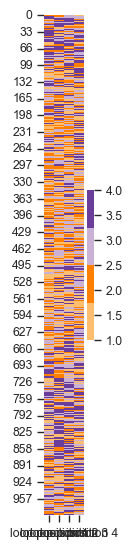

In [464]:
sns.heatmap(reordered_element_df.iloc[:,2:], 
            cmap=sns.color_palette('Paired')[6:10], )
            # linewidths=0.002, linecolor='k', square=False)
util.set_size(0.5,5)
util.save_fig('./fig/Fig3/clusters/tetraloop_loop_colorcoded.pdf')
plt.show()

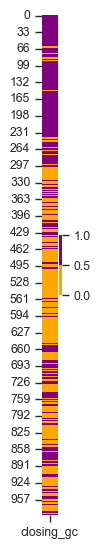

In [477]:
sns.heatmap(reordered_element_df[['closing_gc']], 
            cmap=['orange', 'purple'], )
util.set_size(0.2,5)
util.save_fig('./fig/Fig3/clusters/tetraloop_closing_colorcoded.pdf')

# 07/14/2023

In [487]:
from nnn import element

In [645]:
# qual_palette = ['#9F9EA3', '#3E56A1', '#8F95C5', '#62B448', '#E98E29', '#ED7972']
qual_palette = [
    (255,230,0),
    (214,0,0),
    (249,126,43),
    (25,137,30),
    (38,44,107),
    (142,4,150),
               ]
qual_palette = np.array(qual_palette) / 256

In [488]:
element_fingerprint = element.get_element_fingerprint(arr, 
                                query='Series == "TETRAloop" & ConstructType == "NN"',
                                scaffold_name='bottomScaffold',
                                seq_only=True
                               )

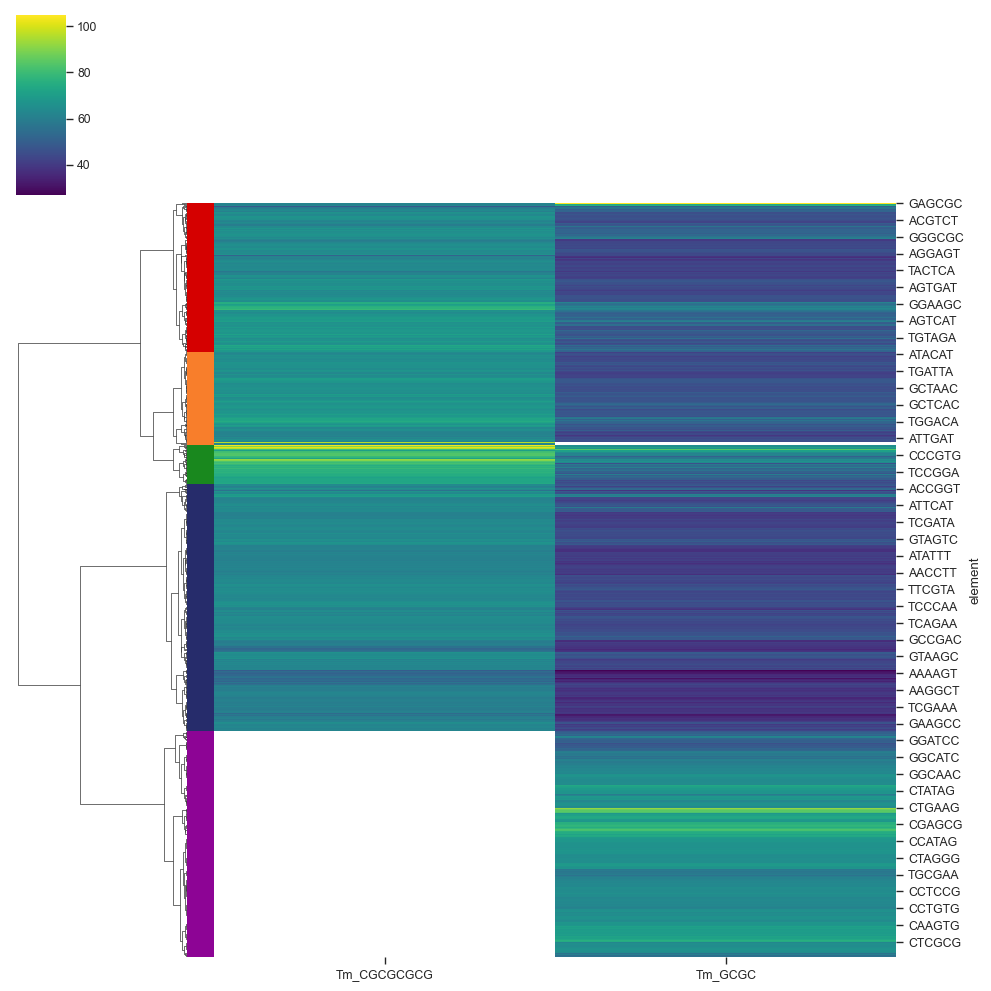

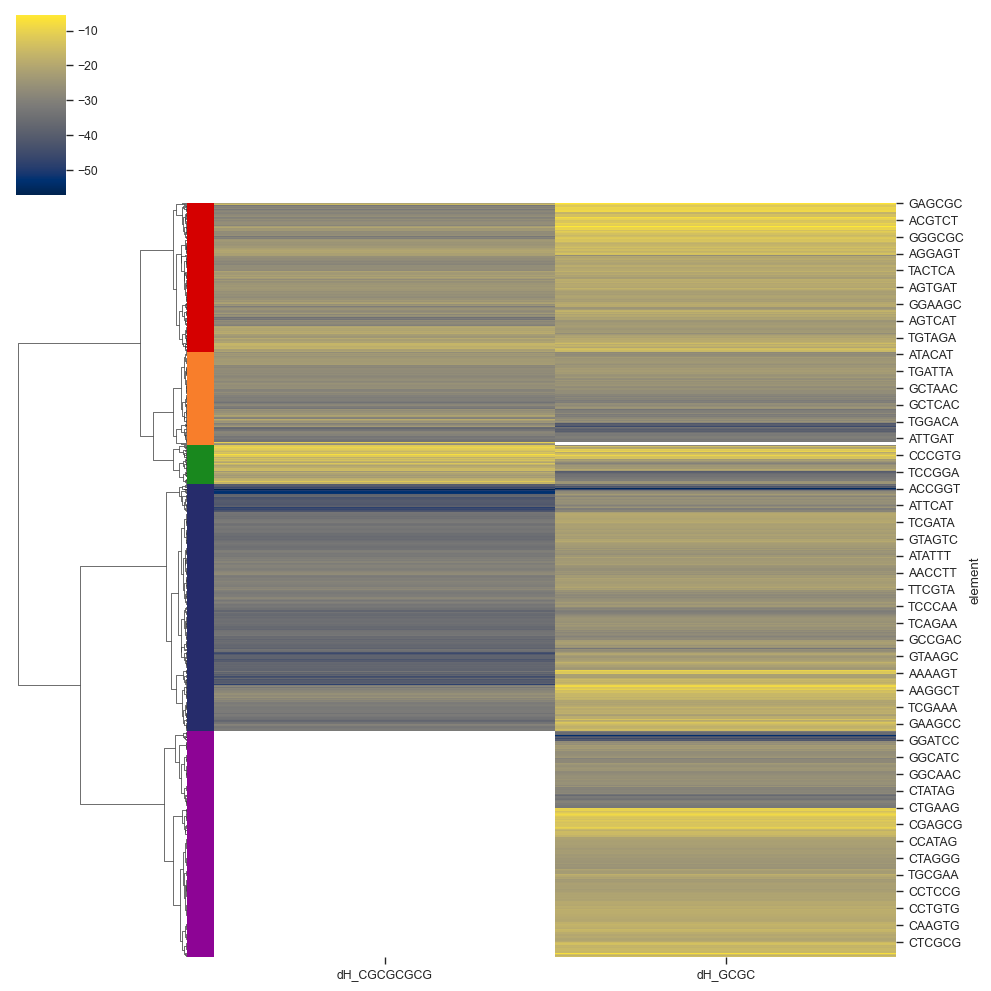

In [647]:
np.random.seed(42)
cluster_arr, reordered_ind = element.ward_cluster(element_fingerprint, t=5, criterion='maxclust')
util.save_multi_image('./fig/Fig3/clusters/tetraloop_clustermap.pdf')

In [648]:
element_fingerprint['cluster_ind'] = cluster_arr

cluster_color = qual_palette[1:max(cluster_arr)+1]

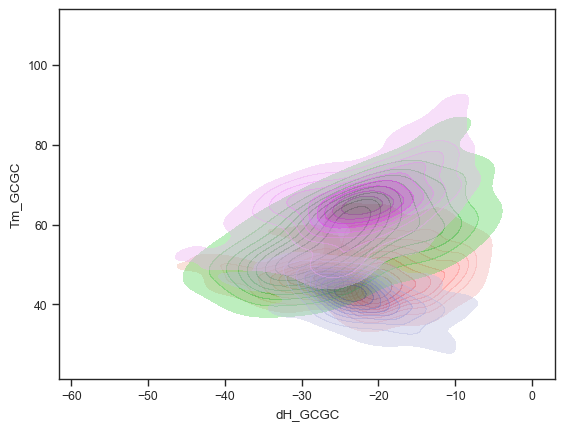

In [650]:
for i in range(1, max(cluster_arr)+1):
    sns.kdeplot(data=element_fingerprint.query('cluster_ind == %d'%i),
                   x='dH_GCGC', y='Tm_GCGC',
                fill=True, alpha=.4, color=qual_palette[i])

In [ ]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)

In [652]:
refseq_list = ['GCG%sCGC'%element for element in element_fingerprint.index]

seqid_list = annotation.reset_index().set_index('RefSeq').loc[refseq_list,:].SEQID.tolist()

df = pd.DataFrame(dict(SEQID=seqid_list, cluster_ind = cluster_arr))

p_unfold = pd.read_csv('./data/models/raw/arr_p_unfold_n=30924.csv', index_col=0)
seqid_list = [seqid for seqid in seqid_list if seqid in p_unfold.index]
df = df.set_index('SEQID').loc[seqid_list,:]

In [653]:
p_unfold_mean = p_unfold.loc[df.index,:].join(df).groupby('cluster_ind').apply(lambda x: np.nanmean(x, axis=0))

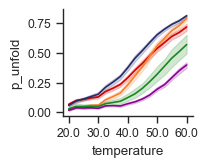

In [677]:
fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
for i,n in enumerate(range(1,max(cluster_arr)+1)):
    mydf = p_unfold.loc[df.index,:].join(df).query('cluster_ind == %d'%n).drop(columns=['cluster_ind']).T
    mydf = mydf.reset_index().melt(id_vars=['index'])
    mydf.columns = ['temperature', 'SEQID', 'p_unfold']
    sns.lineplot(mydf, x='temperature', y='p_unfold', color=qual_palette[n], errorbar=('ci', 99.9), ax=ax)
    
sns.despine()
ax.xaxis.set_major_locator(MultipleLocator(4))
# ax.xaxis.set_minor_locator(MultipleLocator(2))
util.save_fig('./fig/Fig3/clusters/tetraloop_p_unfold_per_cluster.pdf')

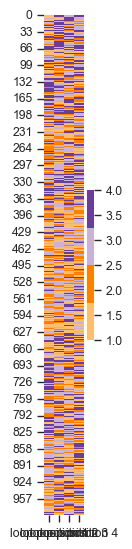

In [681]:
# in the order of the plot
reordered_element_arr = element_fingerprint.index.values[reordered_ind]

base_dict = dict(zip(list('ATCG'), [1,2,3,4]))
reordered_element_df = pd.DataFrame(dict(element=reordered_element_arr))
reordered_element_df['closing_gc'] = [x[0] in {'G','C'} for x in reordered_element_arr]
# reordered_element_df['gc'] = [util.get_GC_content(x) for x in reordered_element_arr]
for n in range(1,5):
    reordered_element_df['loop position %d'%n] = [base_dict[x[n]] for x in reordered_element_arr]

sns.heatmap(reordered_element_df.iloc[:,2:], 
            cmap=sns.color_palette('Paired')[6:10], )
            # linewidths=0.002, linecolor='k', square=False)
util.set_size(0.5,5)
util.save_fig('./fig/Fig3/clusters/tetraloop_loop_colorcoded.pdf')
plt.show()

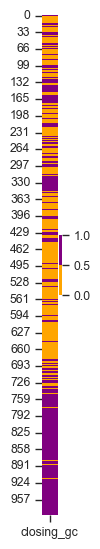

In [679]:
sns.heatmap(reordered_element_df[['closing_gc']], 
            cmap=['orange', 'purple'], )
util.set_size(0.2,5)
util.save_fig('./fig/Fig3/clusters/tetraloop_closing_colorcoded.pdf')

In [682]:
reordered_element_df['gc'] = [util.get_GC_content(x) for x in reordered_element_arr]

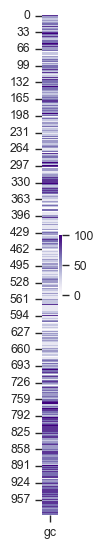

In [684]:
sns.heatmap(reordered_element_df[['gc']], 
            cmap='Purples', )
util.set_size(0.2,5)

# 07/15/2023

In [709]:
mat_df = element.get_element_fingerprint(arr, 
                                query='Series == "TETRAloop" & ConstructType == "NNN"',
                                scaffold_name='bottomScaffold', values=['dG_37'],
                                seq_only=True
                               )

In [710]:
mat_df['stem'] = [x[:2]+x[-2:] for x in mat_df.index]
mat_df['loop'] = [x[2:6] for x in mat_df.index]

In [720]:
mat_df_wide = mat_df.pivot_table(index='loop', columns='stem', values='dG_37_GATCGATC')

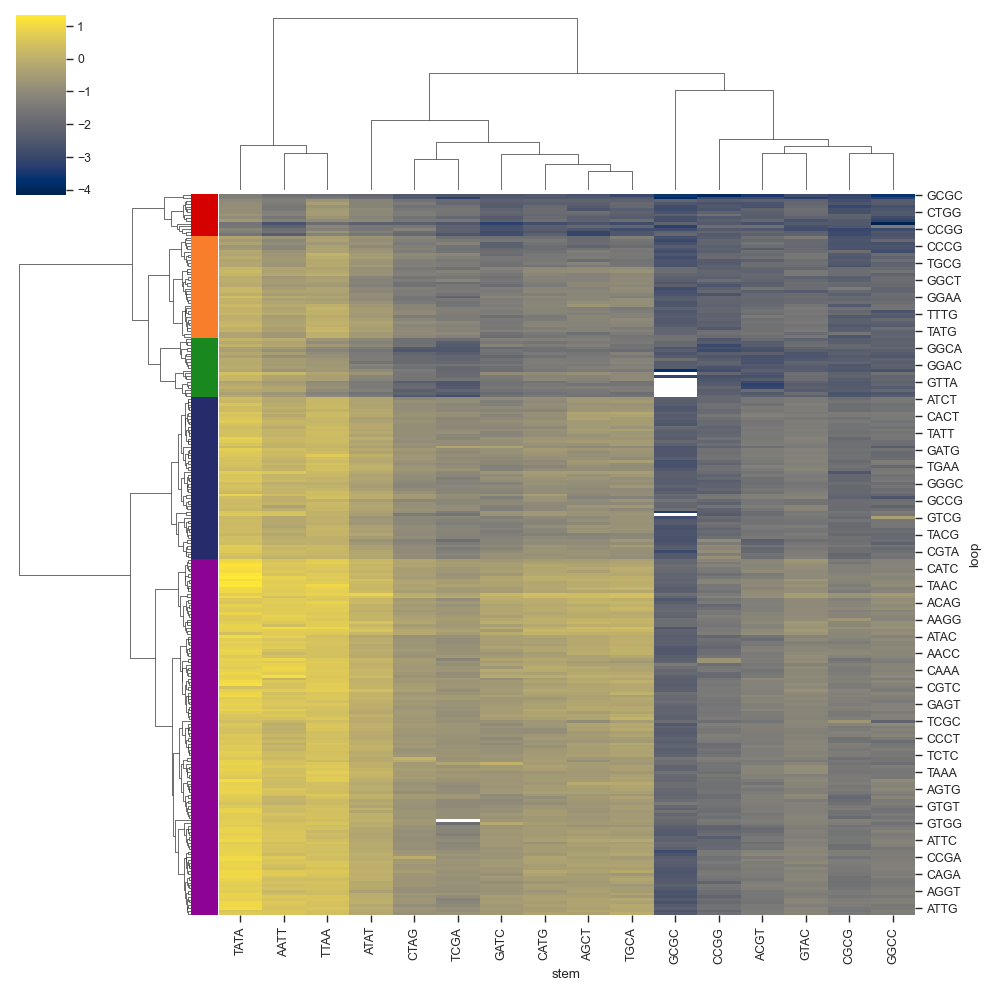

In [721]:
cluster_arr, reordered_ind = element.ward_cluster(mat_df_wide, t=5, split_Tm_dH=False)
util.save_fig('./fig/Fig3/clusters/tetraloop_clustermap_NNN.pdf')

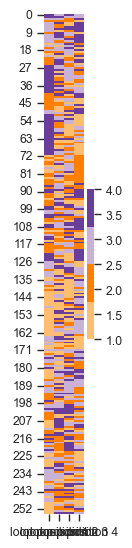

In [731]:
# in the order of the plot
reordered_element_arr = mat_df.index.values[reordered_ind]

base_dict = dict(zip(list('ATCG'), [1,2,3,4]))
reordered_element_df = pd.DataFrame(dict(element=reordered_element_arr))
reordered_element_df['loop'] = [x[2:6] for x in reordered_element_df.element]
# reordered_element_df['closing_gc'] = [x[0] in {'G','C'} for x in reordered_element_arr]
# reordered_element_df['gc'] = [util.get_GC_content(x) for x in reordered_element_arr]
for n in range(1,5):
    reordered_element_df['loop position %d'%n] = [base_dict[x[n-1]] for x in reordered_element_df['loop']]

sns.heatmap(reordered_element_df.iloc[:,2:], 
            cmap=sns.color_palette('Paired')[6:10],
            linewidths=0.0025, linecolor='k', square=False)
util.set_size(0.5,5)
util.save_fig('./fig/Fig3/clusters/tetraloop_loop_colorcoded_NNN.pdf')
plt.show()

In [735]:
reordered_element_df['pair1'] = [x[1]+x[-2] for x in reordered_element_df.element]
reordered_element_df['pair2'] = [x[0]+x[-1] for x in reordered_element_df.element]

In [736]:
reordered_element_df

,element,loop,loop position 1,loop position 2,loop position 3,loop position 4,pair1,pair2
0,AAGCGCTT,GCGC,4,3,4,3,AT,AT
1,AAGGCCTT,GGCC,4,4,3,3,AT,AT
2,AACCTGTT,CCTG,3,3,2,4,AT,AT
3,AATTTATT,TTTA,2,2,2,1,AT,AT
4,AACGAGTT,CGAG,3,4,1,4,AT,AT
...,...,...,...,...,...,...,...,...
250,AAACTATT,ACTA,1,3,2,1,AT,AT
251,AAATGCTT,ATGC,1,2,4,3,AT,AT
252,AAATTGTT,ATTG,1,2,2,4,AT,AT
253,AAACATTT,ACAT,1,3,1,2,AT,AT


# 07/16/2023

In [745]:
import logomaker as lm

In [764]:
qual_palette = [
    (255,230,0),
    (214,0,0),
    (249,126,43),
    (25,137,30),
    (38,44,107),
    (142,4,150),
    (131,164,255)]
qual_palette = np.array(qual_palette) / 256

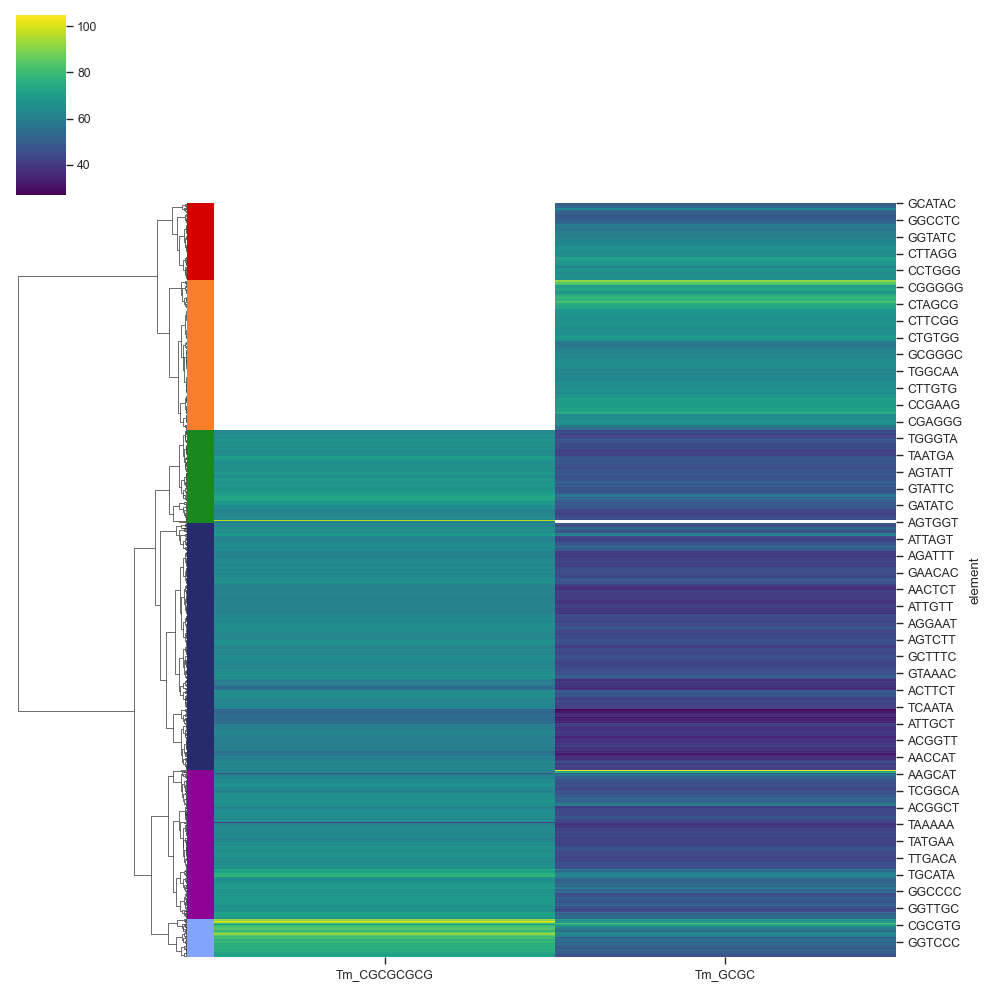

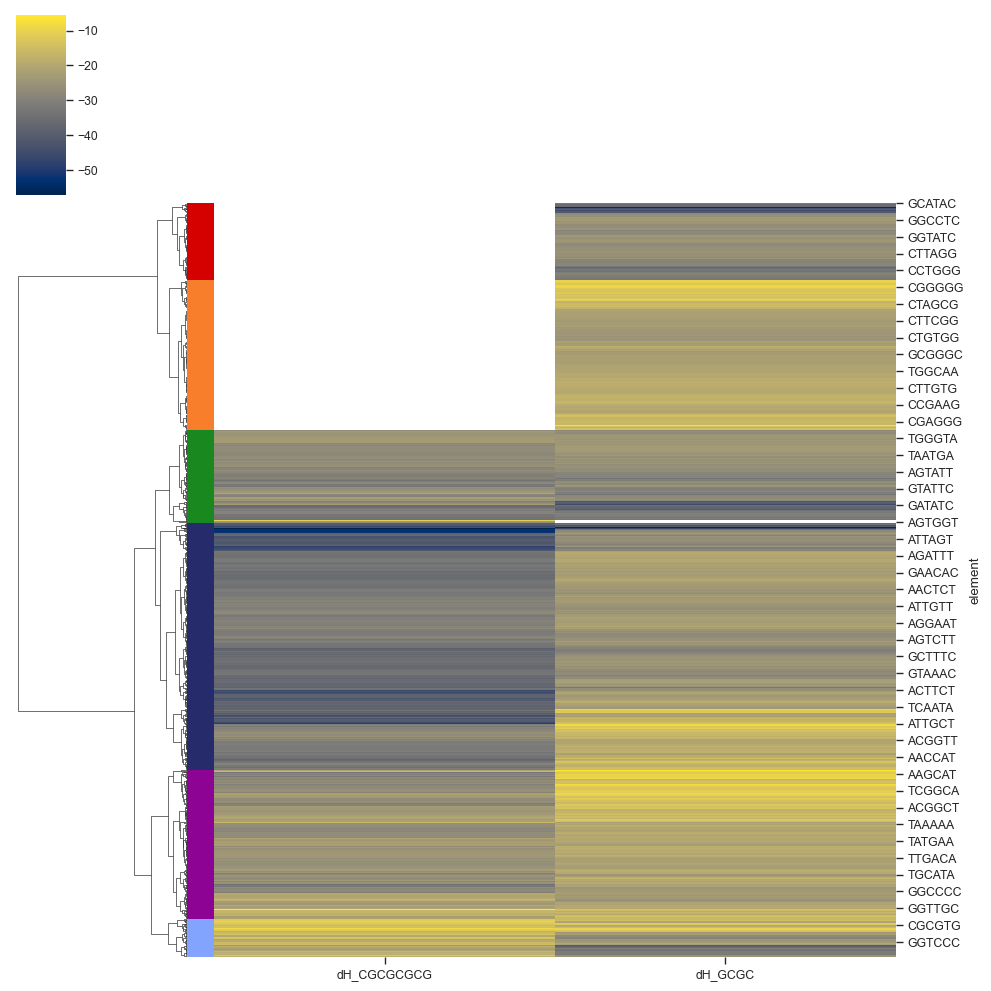

In [762]:
element_fingerprint = element.get_element_fingerprint(arr, 
                                query='Series == "TETRAloop" & ConstructType == "NN"',
                                scaffold_name='bottomScaffold',
                                seq_only=True
                               )

cluster_arr, reordered_ind = element.ward_cluster(element_fingerprint, t=6, criterion='maxclust')
# util.save_multi_image('./fig/Fig3/clusters/tetraloop_clustermap.pdf')

element_fingerprint['cluster_ind'] = cluster_arr
cluster_color = qual_palette[1:max(cluster_arr)+1]

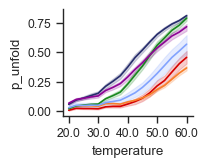

In [765]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file)

refseq_list = ['GCG%sCGC'%element for element in element_fingerprint.index]

seqid_list = annotation.reset_index().set_index('RefSeq').loc[refseq_list,:].SEQID.tolist()

df = pd.DataFrame(dict(SEQID=seqid_list, cluster_ind = cluster_arr))

p_unfold = pd.read_csv('./data/models/raw/arr_p_unfold_n=30924.csv', index_col=0)
seqid_list = [seqid for seqid in seqid_list if seqid in p_unfold.index]
df = df.set_index('SEQID').loc[seqid_list,:]

p_unfold_mean = p_unfold.loc[df.index,:].join(df).groupby('cluster_ind').apply(lambda x: np.nanmean(x, axis=0))

fig, ax = plt.subplots(figsize=(4.25*cm, 3.5*cm))
for i,n in enumerate(range(1,max(cluster_arr)+1)):
    mydf = p_unfold.loc[df.index,:].join(df).query('cluster_ind == %d'%n).drop(columns=['cluster_ind']).T
    mydf = mydf.reset_index().melt(id_vars=['index'])
    mydf.columns = ['temperature', 'SEQID', 'p_unfold']
    sns.lineplot(mydf, x='temperature', y='p_unfold', color=qual_palette[n], errorbar=('ci', 99.9), ax=ax)
    
sns.despine()
ax.xaxis.set_major_locator(MultipleLocator(4))
# ax.xaxis.set_minor_locator(MultipleLocator(2))
util.save_fig('./fig/Fig3/clusters/tetraloop_p_unfold_per_cluster.pdf')

In [767]:
df = df.join(annotation['RefSeq'])

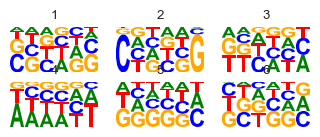

In [778]:
fig, ax = plt.subplots(2,3)
ax=ax.flatten()
for n in range(1,max(cluster_arr)+1):
    cls_seq_list = df.query('cluster_ind == %d'%n).RefSeq.tolist()
    counts_mat = lm.alignment_to_matrix(cls_seq_list)
    lm.Logo(counts_mat.iloc[3:-3,:],
            stack_order='small_on_top',
            ax=ax[n-1])
    ax[n-1].axis('off')
    ax[n-1].set_title(n)
    util.set_size(3,1)
    # plt.show()
    
util.save_multi_image('./fig/Fig3/clusters/tetraloop_cluster_logo.pdf')

In [782]:
arr.query( 'Series == "TETRAloop" & ConstructType == "NN" & bottomScaffold == "CGCGCGCG"').RefSeq

SEQID
TETNN1024    CGCGGAAAAATCCGCG
TETNN1025    CGCGGAAAATTCCGCG
TETNN1026    CGCGGAAAACTCCGCG
TETNN1027    CGCGGAAAAGTCCGCG
TETNN1028    CGCGGAAATATCCGCG
                   ...       
TETNN1973    CGCGGCCGTTGCCGCG
TETNN1978    CGCGGCCGCCGCCGCG
TETNN1981    CGCGGCCGGTGCCGCG
TETNN2000    CGCGGCGTAAGCCGCG
TETNN2029    CGCGGCGCGTGCCGCG
Name: RefSeq, Length: 692, dtype: object

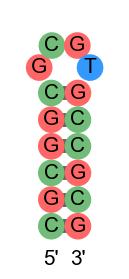

In [784]:
row = arr.loc['TETNN2029']
draw_struct(row.RefSeq, row.TargetStruct)

In [790]:
funny_element = element_fingerprint.query('Tm_GCGC > Tm_CGCGCGCG').index.tolist()

In [800]:
def refseq_2_seqid(refseq_list):
    seqid_list = annotation.reset_index().set_index('RefSeq').loc[refseq_list,:].SEQID.tolist()
    return seqid_list

In [805]:
refseq_list = ['GCG%sCGC'%element for element in funny_element]
seqid_list = refseq_2_seqid(refseq_list)
# seqid_list = [seqid for seqid in seqid_list if seqid in p_unfold.index]

refseq_long_list = ['CGCGG%sCCGCG'%element for element in funny_element]
seqid_long_list = refseq_2_seqid(refseq_long_list)
# seqid_long_list = [seqid for seqid in seqid_list if seqid in p_unfold.index]

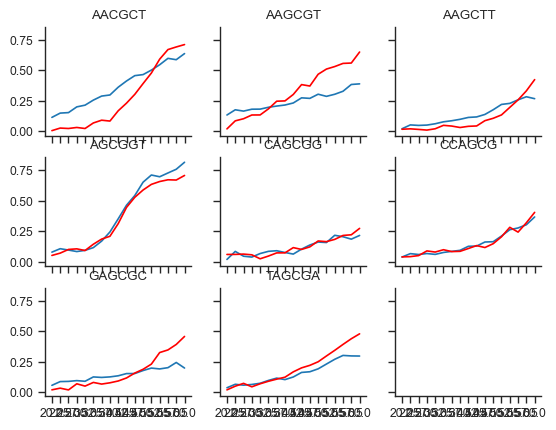

In [807]:
fig, ax = plt.subplots(3,3, sharex=True, sharey=True)
ax=ax.flatten()
for i,seqid in enumerate(seqid_list):
    ax[i].plot(p_unfold.loc[seqid])
    ax[i].plot(p_unfold.loc[seqid_long_list[i]], 'r')
    ax[i].set_title(funny_element[i])
    sns.despine()

Not too interesting. Giving up.

Now moving on to internal loops.